In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from test_model import test_model
from sklearn.metrics import confusion_matrix
from sc_sharp import scSHARP
import utilities

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
grid_results = pd.read_csv("grid_search_jung_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Val Accuracy", "Test Accuracy", "Total SD", "Val SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])
grid_results['GCN Layers'] = pd.to_numeric(grid_results['GCN Layers'])
grid_results['Final Embedding'] = pd.to_numeric(grid_results['Final Embedding'])
grid_results.sort_values("Val Accuracy", ascending=False).head(10)

,Total Accuracy,Val Accuracy,Test Accuracy,Total SD,Val SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
1,0.923555,0.946512,0.0,0.001590,0.008531,0.0,2_25.txt,0.0,20,2,2,25
145,0.923410,0.945736,0.0,0.002360,0.012659,0.0,2_60.txt,0.0,20,2,2,60
136,0.923410,0.945736,0.0,0.001180,0.006329,0.0,2_15.txt,0.0,65,2,2,15
10,0.923410,0.945736,0.0,0.001362,0.007309,0.0,2_25.txt,0.0,65,2,2,25
91,0.923266,0.944961,0.0,0.001980,0.010623,0.0,2_40.txt,0.0,20,2,2,40
154,0.923266,0.944961,0.0,0.002094,0.011234,0.0,2_60.txt,0.0,65,2,2,60
127,0.923266,0.944961,0.0,0.001980,0.010623,0.0,2_15.txt,0.0,20,2,2,15
142,0.923121,0.944186,0.0,0.002437,0.013074,0.0,2_15.txt,0.0,95,2,2,15
178,0.923121,0.944186,0.0,0.002239,0.012009,0.0,3_25.txt,0.0,95,2,3,25


<AxesSubplot:xlabel='Batch', ylabel='Val Accuracy'>

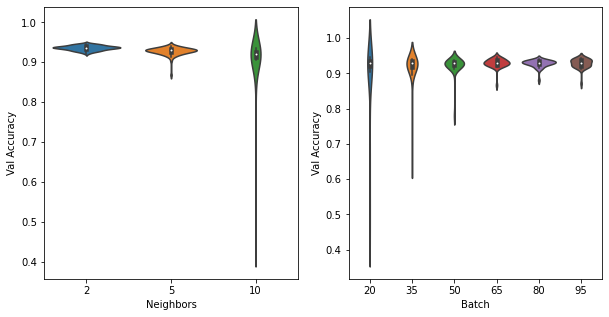

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Val Accuracy"], ax = axs[1])

<AxesSubplot:xlabel='Final Embedding', ylabel='Val Accuracy'>

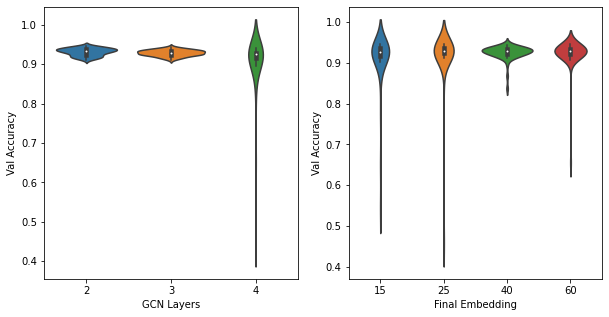

In [15]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Val Accuracy"], ax = axs[1])

In [2]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/jung/"]
tools = ["sctype","scsorter","scina"]
votes_necessary = .51
model_file = "configs/2_25.txt"
neighbors = 2
batch_size=20
training_epochs=150
random_inits = 5
counts="counts.csv"
meta="labels.csv"
meta_col = 0

In [3]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

[0.8670520186424255, 0.8612716794013977, 0.8627167344093323, 0.8627167344093323, 0.8627167344093323]


/home/users/lewinsda/scSHARP/utilities.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,jung,GCN,0.863295,0.865325,0.834783,0.002192,0.000000,0.032969
1,jung,Max Col.,0.852601,0.865325,0.673913,0.000000,0.000000,0.000000
2,jung,Confident Labels,NaN,0.865325,NaN,0.000000,0.000000,0.000000
3,jung,sctype,0.848266,0.863777,0.630435,0.000000,0.000000,0.000000
4,jung,scsorter,0.774566,0.828173,0.021739,0.000000,0.000000,0.000000
5,jung,scina,0.539017,0.577399,0.000000,0.000000,0.000000,0.000000
6,jung,Tool Avg.,0.720617,0.756450,0.217391,0.161529,0.156081,0.357871


Text(0.5, 1.0, 'Total Accuracy by Method')

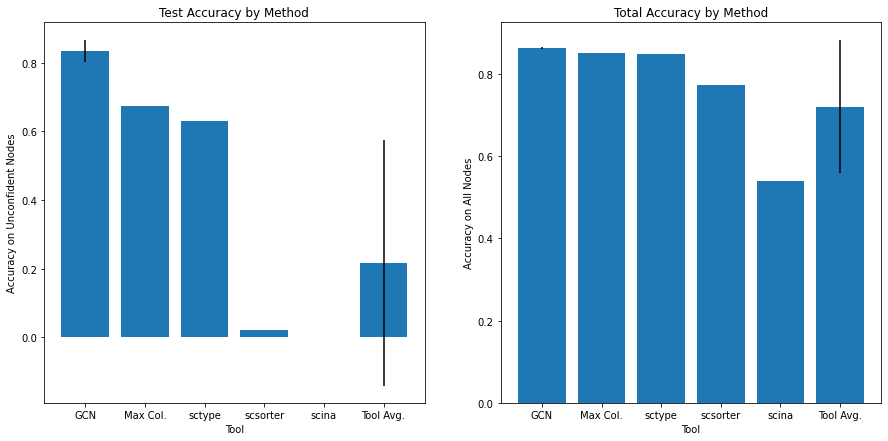

In [4]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")

In [2]:
real_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/labels.csv", index_col=0).iloc[:,0]
real_labels,keys = pd.factorize(real_labels, sort=True)
keys

Index(['spc', 'spd', 'spg'], dtype='object')

In [3]:
np.count_nonzero(real_labels == 0)

244

In [19]:
data_path = "/home/groups/ConradLab/daniel/sharp_data/jung/counts.csv"
tool_preds = "/home/groups/ConradLab/daniel/sharp_data/jung/preds.csv"
tool_list = ["scina", "scsorter", "sctype"]
marker_path = "/home/groups/ConradLab/daniel/sharp_data/jung/markers.txt"
neighbors=2
config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [20]:
preds, train_nodes, test_nodes, keep_cells = sharp.run_prediction(training_epochs=150, thresh=0.51, batch_size=20, seed=8)

Loss in epoch 0 = 16.433144
Loss in epoch 10 = 0.023771
Loss in epoch 20 = 0.005226
Loss in epoch 30 = 0.002527
Loss in epoch 40 = 0.001270
Loss in epoch 50 = 0.001025
Loss in epoch 60 = 0.000594
Loss in epoch 70 = 0.000437
Loss in epoch 80 = 0.000288
Loss in epoch 90 = 0.000235
Loss in epoch 100 = 0.000189
Loss in epoch 110 = 0.000133
Loss in epoch 120 = 0.000102
Loss in epoch 130 = 0.000099
Loss in epoch 140 = 0.000068


In [21]:
utilities.validation_metrics(torch.tensor(real_labels), preds.cpu(), train_nodes, test_nodes)

(0.865606963634491,
 array([[162,  79,   3],
        [ 10, 146,   0],
        [  1,   0, 291]]),
 0.8653250932693481,
 array([[136,  74,   2],
        [ 10, 142,   0],
        [  1,   0, 281]]),
 0.8695651888847351,
 array([[26,  5,  1],
        [ 0,  4,  0],
        [ 0,  0, 10]]))

In [22]:
len(train_nodes)

646

In [23]:
len(test_nodes)

46

[Text(0.5, 15.0, 'Cell Type')]

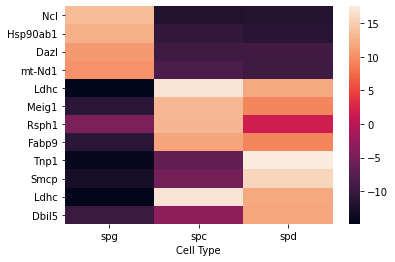

In [37]:
int_df = sharp.run_interpretation()

int_df.columns = keys
reorg_keys = ["spg","spc","spd"]
int_df = int_df[reorg_keys]
keep_genes = int_df.sort_values("spg", ascending=False).head(4).index.tolist()
keep_genes += int_df.sort_values("spc", ascending=False).head(4).index.tolist()
keep_genes += int_df.sort_values("spd", ascending=False).head(4).index.tolist()
ax = sns.heatmap(int_df.loc[keep_genes,:])
ax.set(xlabel="Cell Type")

In [25]:
int_df.loc["Aurka"]

spc    1.540868
spd   -0.872309
spg    0.246122
Name: Aurka, dtype: float32

In [38]:
#spc,Insl6,Piwil1,Pttg1,Spag6,Mllt10,Aurka
keep_genes = int_df.sort_values("spc", ascending=False).head(10).index.tolist()
#keep_genes = int_df.sort_values("spd", ascending=False).head(10).index.tolist()
#keep_genes = int_df.sort_values("spg", ascending=False).head(10).index.tolist()
int_df.loc[keep_genes,:]

,spg,spc,spd
Ldhc,-14.847646,16.857750,11.997261
Meig1,-11.289430,13.202641,9.298755
Rsph1,-4.569043,13.024635,1.660961
Fabp9,-11.308181,11.615453,9.368320
Ropn1l,-9.209205,11.497373,7.118403
Morf4l1,-3.839481,10.970502,1.357726
Cox8c,-4.162146,9.574133,1.922056
Lyar,0.884103,9.111647,-3.359817
Gkap1,-1.089301,8.726265,-1.334473
Cetn1,-3.983795,8.716872,2.126095
